#### Connecting to ev_sales database and Data Collection using SQL Queries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Milestone 1 : Data Collection
Getting data from database -- scooter sales data

In [27]:
import pymysql
conn = pymysql.connections.Connection(host="127.0.0.1",user='root',password='Kunal@100$',
                                      database='zoom_electric', port=3306)

In [37]:
query ="""
SELECT s.sales_transaction_date,p.model,p.year,p.base_price, 
s.channel,p.product_id,
DATE_FORMAT(STR_TO_DATE(p.production_start_date,'%d-%m-%Y'),'%d-%m-%Y') as production_start_date
FROM sales s
INNER JOIN products p ON s.product_id=p.product_id 
WHERE 
-- p.model = 'Sprint' AND 
p.product_type='scooter'
ORDER BY s.sales_transaction_date
;
"""

In [38]:
df= pd.read_sql_query(query,conn)
df.head()

,sales_transaction_date,model,year,base_price,channel,product_id,production_start_date
0,2010-03-10 07:28:00,FioNex,2010,63998,internet,1,03-03-2010
1,2010-03-12 22:52:00,FioNex,2010,63998,internet,1,03-03-2010
2,2010-03-15 00:09:00,FioNex,2010,63998,internet,1,03-03-2010
3,2010-03-17 09:34:00,FioNex,2010,63998,internet,1,03-03-2010
4,2010-03-18 23:21:00,FioNex,2010,63998,internet,1,03-03-2010


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34284 entries, 0 to 34283
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   sales_transaction_date  34284 non-null  datetime64[ns]
 1   model                   34284 non-null  object        
 2   year                    34284 non-null  int64         
 3   base_price              34284 non-null  int64         
 4   channel                 34284 non-null  object        
 5   product_id              34284 non-null  int64         
 6   production_start_date   34284 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.8+ MB


In [40]:
from datetime import datetime

In [70]:
# df['sales_date']= df['sales_transaction_date'].dt.date
# # pd.to_datetime(df['time']).dt.date
# df['sales_date'] = df['sales_date'].dt.normalize()
df['sales_date']=pd.to_datetime(df['sales_transaction_date']).dt.normalize()
df['year'] = pd.DatetimeIndex(df['sales_date']).year
df['sales_month'] = pd.DatetimeIndex(df['sales_date']).month

In [127]:
dfsprint = df[df['model']== 'Sprint']
dfsprint.head()

,sales_transaction_date,model,year,base_price,channel,product_id,production_start_date,sales_date,sales_month
13536,2016-10-10 00:41:00,Sprint,2016,95998,internet,7,10-10-2016,2016-10-10,10
13538,2016-10-10 02:47:00,Sprint,2016,95998,dealership,7,10-10-2016,2016-10-10,10
13539,2016-10-10 04:21:00,Sprint,2016,95998,dealership,7,10-10-2016,2016-10-10,10
13540,2016-10-10 07:42:00,Sprint,2016,95998,dealership,7,10-10-2016,2016-10-10,10
13541,2016-10-10 09:21:00,Sprint,2016,95998,internet,7,10-10-2016,2016-10-10,10


In [96]:
# df.groupby(['sales_date','model']).agg({'product_id':'count'}).reset_index()
dfsprint1= dfsprint[(dfsprint['year']== 2016) & (dfsprint['sales_month'].isin([10,11]))]

In [ ]:
# plt.figure(figsize=(12,6))
# dfs.groupby('sales_date').agg({'product_id':'count'}).reset_index().plot(x= 'sales_date',y='product_id')
# plt.show()

### Milestone 2 : Validating the Problem Statement
Plotting the Sprint Scooters Growth : Sales date Vs Scooters Sold

#### Summarizing Sales Data

In [139]:
dfsprint2=dfsprint1.groupby('sales_date').agg({'product_id':'count'}).reset_index()

In [98]:
dfsprint2.head()

,sales_date,product_id
0,2016-10-10,9
1,2016-10-11,6
2,2016-10-12,10
3,2016-10-13,10
4,2016-10-14,5


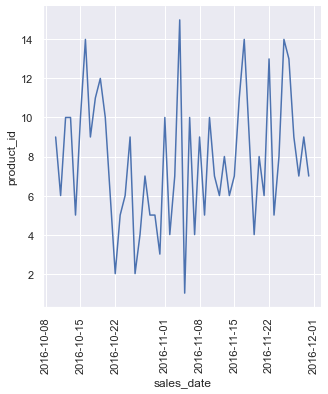

In [121]:
# plt.figure(figsize=(12,4))
# sns.set(rc={'figure.figsize':(12.5,8.27)})
sns.relplot(data=dfsprint2, x="sales_date", y="product_id", kind="line")
plt.xticks(rotation=90)
plt.show()

In [116]:
dfmodel = df[df['model'].isin(['Sprint','FioNex','FioNex Limited Edition'])]
dfmodel= dfmodel[(dfmodel['year']== 2016) & (dfmodel['sales_month'].isin([10,11]))]

In [117]:
dfmodel2=dfmodel.groupby(['sales_date','model']).agg({'product_id':'count'}).reset_index()

In [122]:
# sns.relplot(data=dfmodel2, x="sales_date", y="product_id", kind="line", hue= 'model')
# plt.xticks(rotation=90)
# plt.show()

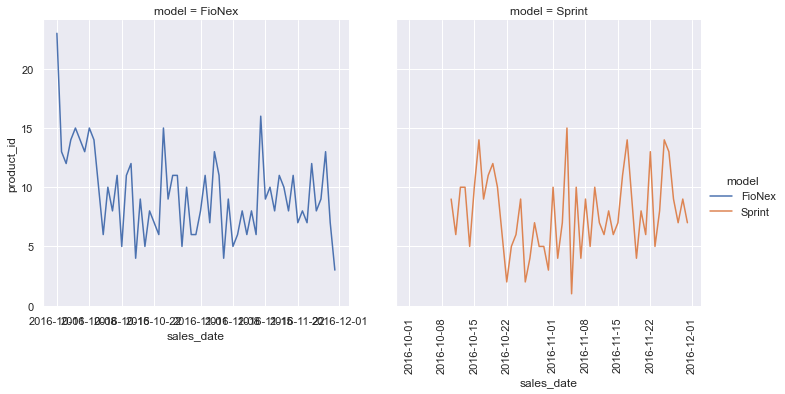

In [119]:
sns.relplot(data=dfmodel2, x="sales_date", y="product_id", kind="line", hue= 'model',col = 'model')
plt.xticks(rotation=90)
plt.show()

We can look here for Sprint Scooters sales got decreased drastically after the first two weeks of launch , since its launch on 10-10-2016; assuming production start date is the product lauch date also - since for each of the variant firs  sales transaction is being done on the day of production start date itself;

#### Quantifying the drop in sales for sprint  scooters

In [131]:
# dfsprint2.head(10)

In [142]:
dfsprint2['last7days']=dfsprint2['product_id'].rolling(7).sum()

In [143]:
dfsprint2['growth'] = dfsprint2['last7days'].pct_change()
dfsprint2.head(10)
# dfsprint2.drop(['Change'], axis=1)

,sales_date,product_id,last7days,growth
0,2016-10-10,9,NaN,NaN
1,2016-10-11,6,NaN,NaN
2,2016-10-12,10,NaN,NaN
3,2016-10-13,10,NaN,NaN
4,2016-10-14,5,NaN,NaN
5,2016-10-15,10,NaN,NaN
6,2016-10-16,14,64.0,NaN
7,2016-10-17,9,64.0,0.000000
8,2016-10-18,11,69.0,0.078125
9,2016-10-19,12,71.0,0.028986


<Figure size 576x144 with 0 Axes>

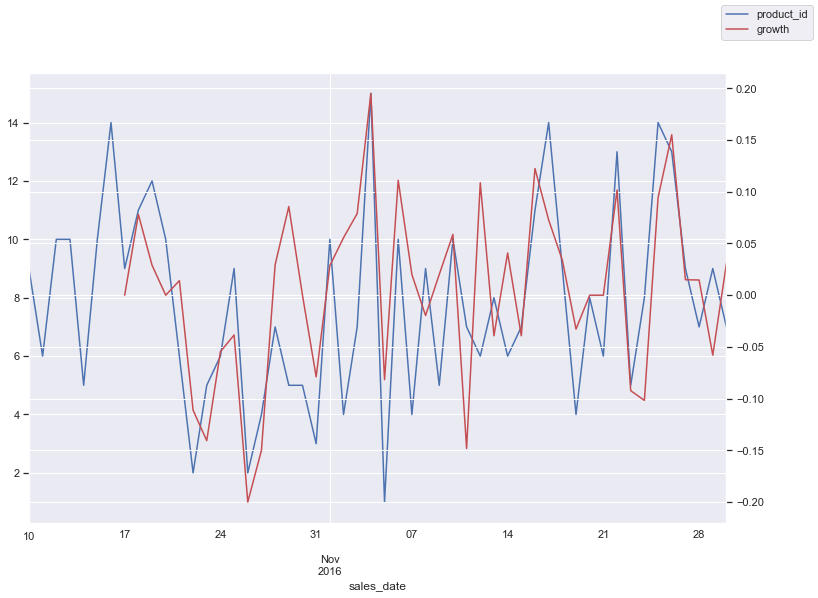

In [146]:
plt.figure(figsize=(8,2))
ax = dfsprint2.plot(x="sales_date", y="product_id", legend=False)
ax2 = ax.twinx()
dfsprint2.plot(x="sales_date", y="growth", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

Here we can see than 7 days Rolling growth is dropped below zero to 20 % 

### Milestone 3 : Exploratory Data Analysis

What caused this drop ?

We have Three Diffeernt Scooter Variants - FioNex,Sprint,Parker and its Limited Editions

#### Approach - Univariate and Bi Variate Analysis
We have three impportant data set here - sales, email and products - we will first analyze these tables and its columns then we try to establish  relations between them with drop in sales growth

In [157]:
query ="""
SELECT product_id,model,year,base_price,
DATE_FORMAT(STR_TO_DATE(production_start_date,'%d-%m-%Y'),'%d-%m-%Y') as production_start_date FROM products
WHERE product_type = 'scooter';
;
"""

In [158]:
products= pd.read_sql_query(query,conn)
products.head(15)

,product_id,model,year,base_price,production_start_date
0,1,FioNex,2010,63998,03-03-2010
1,2,FioNex Limited Edition,2011,127998,03-01-2011
2,3,FioNex,2013,79998,01-05-2013
3,5,Parker,2014,111998,23-06-2014
4,7,Sprint,2016,95998,10-10-2016
5,8,Sprint Limited Edition,2017,111998,15-02-2017
6,12,FioNex Zester,2019,55998,04-02-2019


In [167]:
# sns.relplot(data=products,x= 'production_start_date',y='base_price', hue = 'model')
# plt.xticks(rotation=90)
# plt.show()

In [171]:
# df
df2=df.groupby(['sales_date','model']).agg({'product_id':'count'}).reset_index()
df2.head()

,sales_date,model,product_id
0,2010-03-10,FioNex,1
1,2010-03-12,FioNex,1
2,2010-03-15,FioNex,1
3,2010-03-17,FioNex,1
4,2010-03-18,FioNex,1


In [ ]:
df_prod = pd.merge()